In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data collection analysis & Visualization

In [4]:
df = pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# no of rows and cols
df.shape

(1338, 7)

In [6]:
# getting the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical variables:
    sex, smoker, region

In [7]:
# checking for missing values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/Users/mahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


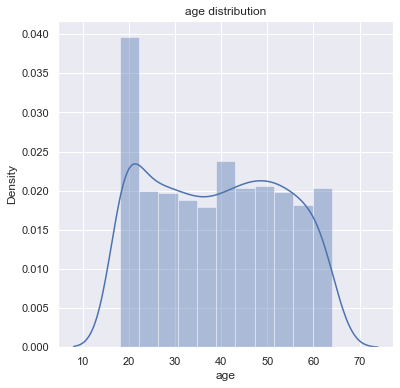

In [9]:
#distribution of age values
sns.set()
plt.figure(figsize= (6,6))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

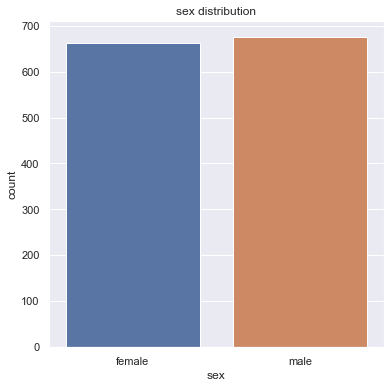

In [10]:
#Gender columns 
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = df)
plt.title('sex distribution')
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/Users/mahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


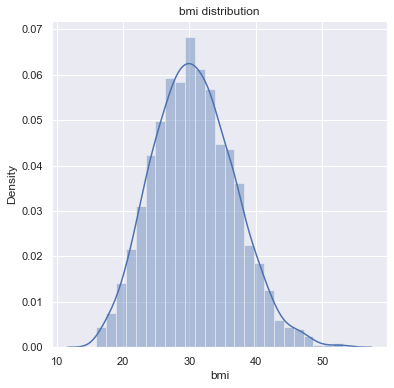

In [12]:
#distribution of bmi values
sns.set()
plt.figure(figsize= (6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

normal bmi range : 18.5 to 24.9

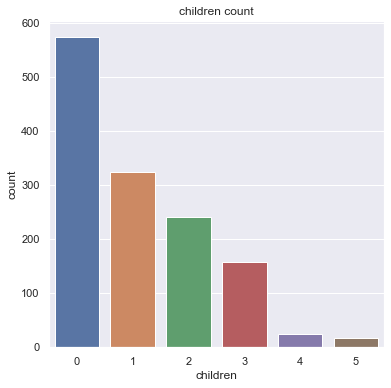

In [13]:
#children column
sns.set()
plt.figure(figsize= (6,6))
sns.countplot(x = 'children', data = df)
plt.title('children count')
plt.show()

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

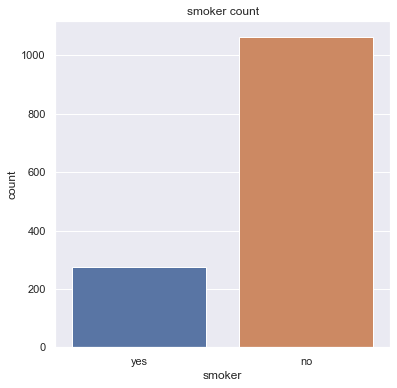

In [15]:
#smoker column
sns.set()
plt.figure(figsize= (6,6))
sns.countplot(x = 'smoker', data = df)
plt.title('smoker count')
plt.show()

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

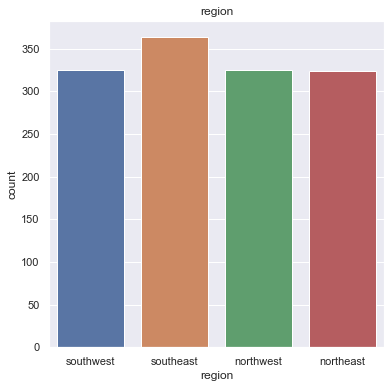

In [17]:
#region column 
sns.set()
plt.figure(figsize= (6,6))
sns.countplot(x = 'region', data = df)
plt.title('region')
plt.show()

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/Users/mahi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


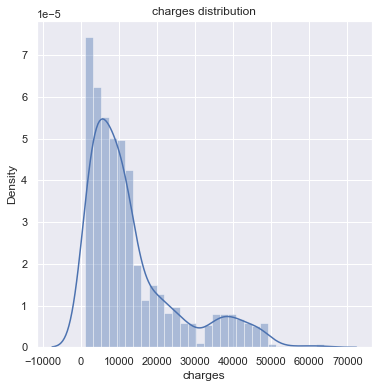

In [19]:
#distribution of charges
sns.set()
plt.figure(figsize= (6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

In [20]:
# sns.pairplot(df)
# plt.figure(figsize=(10,10))

In [21]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


age, bmi, smoker columns show some correlation with charges.

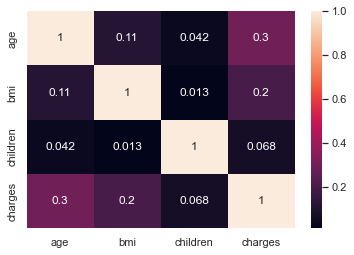

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

encoding the categorical features.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
c = ['sex', 'smoker', 'region']
for i in c:
    df[i] = le.fit_transform(df[i])

In [27]:
df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061


we could have also used df.replace({'sex':{'male':0, 'famale':1}}, inplace = True) and so on for all 3 columns 

# Data Visualization using reg plots

<AxesSubplot:xlabel='age', ylabel='charges'>

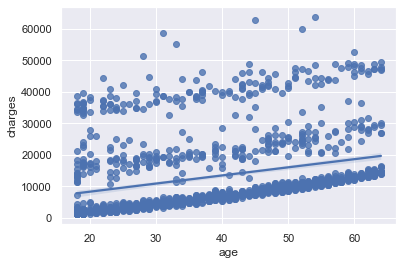

In [28]:
sns.regplot(x='age', y='charges', data = df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

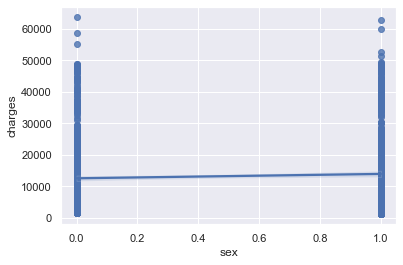

In [29]:
sns.regplot(x='sex', y='charges', data = df)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

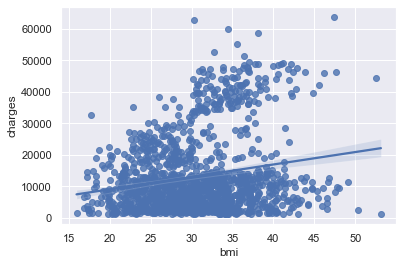

In [30]:
sns.regplot(x='bmi', y='charges', data = df)

<AxesSubplot:xlabel='children', ylabel='charges'>

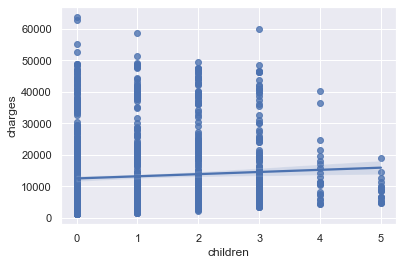

In [31]:
sns.regplot(x='children', y='charges', data = df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

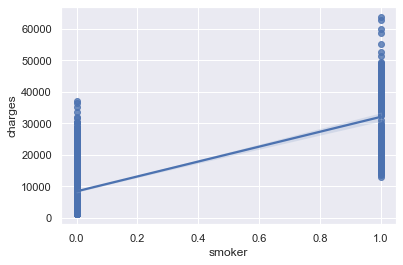

In [32]:
sns.regplot(x='smoker', y='charges', data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

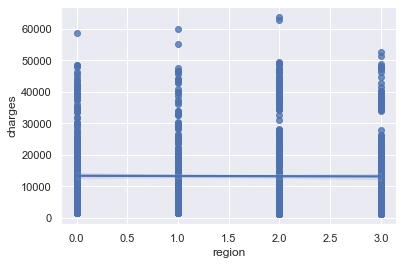

In [33]:
sns.regplot(x='region', y='charges', data = df)

# Outlier analysis

In [34]:
col = ['age', 'sex', 'bmi', 'children', 'region', 'charges']

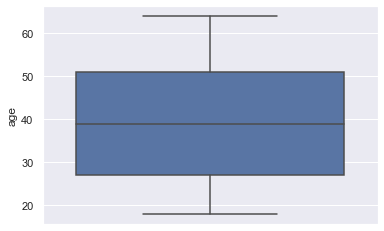

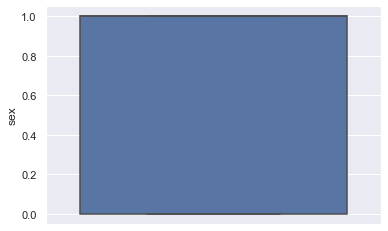

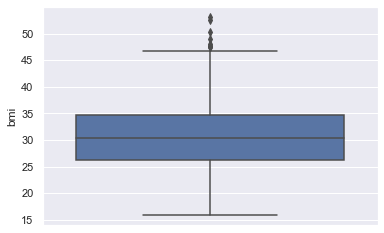

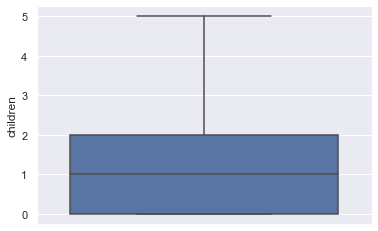

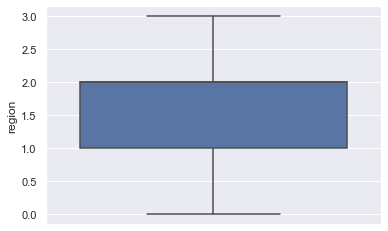

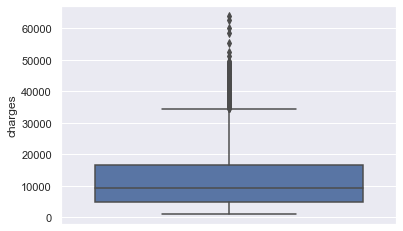

In [35]:
for c in col:
    plt.figure()
    sns.boxplot(y=c, data = df)
    plt.show()

There are outliers in bmi and charges

In [39]:
for c in col:
    percentile25 = df[c].quantile(0.25)
    percentile75 = df[c].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75+(1.5*iqr)
    lower_limit = percentile25-(1.5*iqr)
    df = df[df[c]>lower_limit]
    df = df[df[c]<upper_limit]

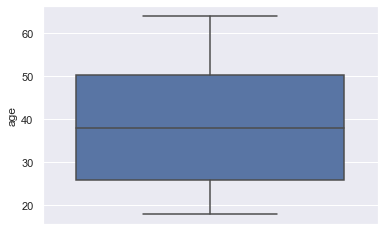

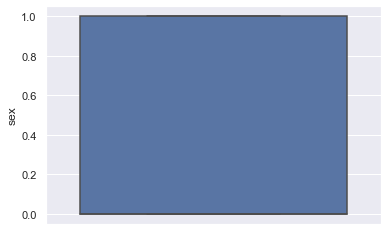

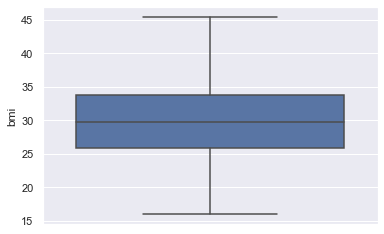

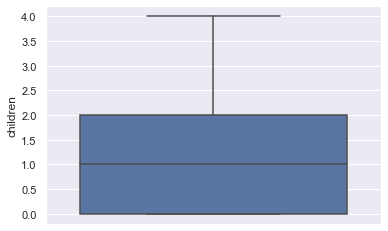

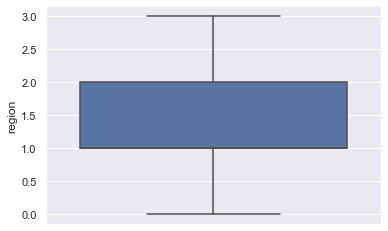

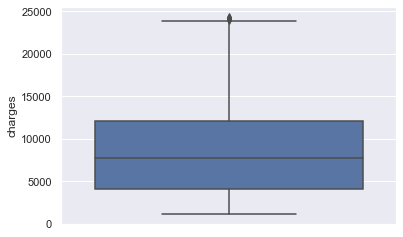

In [40]:
for c in col:
    plt.figure()
    sns.boxplot(y=c, data = df)
    plt.show()

Since these outlier are ligitimate observations of the popuation we are studying, so i'd prefer not to remove them, although we can always remove these outlier using code which i wrote above as command lines.

Keeping this as a doubt

# Linear Regression

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


In [42]:
x1 = df.drop(columns='charges',axis=1).values
y1 = df['charges'].values

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=10)


In [45]:
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((876, 6), (220, 6), (876,), (220,))

In [49]:
# from sklearn.preprocessing import StandardScaler

In [50]:
# sc = StandardScaler()

In [51]:
# x1_train = sc.fit_transform(x1_train)
#x1_test = sc.transform(x1_test)

In [52]:
from sklearn import linear_model

In [53]:
lr = linear_model.LinearRegression()

In [54]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [55]:
lr.coef_

array([  231.72383086,  -199.25011158,    40.67834907,   489.99015166,
       12907.42878649,  -348.29117683])

In [56]:
lr.intercept_

-2405.1304429083157

In [57]:
y1_pred = lr.predict(x1_test)

In [58]:
from sklearn import metrics 

In [59]:
metrics.mean_squared_error(y1_test, y1_pred)

7411557.975177772

In [60]:
np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))

2722.4176709641324

In [63]:
lr.score(x1_train, y1_train)

0.6828792641418668

In [64]:
lr.score(x1_test, y1_test)

0.7418209089631401

In [66]:
metrics.r2_score(y1_test, y1_pred)

0.7418209089631401

In [67]:
metrics.mean_squared_error(y1_test, y1_pred)

7411557.975177772

In [68]:
# plt.plot(y1_test, label='original')
# plt.plot(y1_pred, label = 'predicted')
# plt.legend()
# plt.show()

# keepig this code to clear doubts about it

# Support Vector Regression

In [69]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


In [70]:
x2 = df.iloc[:,0:-1].values
y2 = df.iloc[:,-1:].values

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scx = StandardScaler()
scy = StandardScaler()

In [73]:
x2 = scx.fit_transform(x2)
y2 = scy.fit_transform(y2)

In [74]:
from sklearn.svm import SVR

In [75]:
svr2 = SVR(kernel ='rbf')

In [76]:
svr2.fit(x2,y2.flatten())

SVR()

In [77]:
y2_pred = svr2.predict(x2)

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
r2score = svr2.score(x2, y2)
print("R-squared:", r2score)
print("MSE:", mean_squared_error(y2, y2_pred))

R-squared: 0.7048209653339954
MSE: 0.29517903466600465


In [73]:
metrics.r2_score(y2, y2_pred)

0.6543586660651541

# K-nearest neighbours

In [80]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


In [81]:
x3 = df.iloc[:,0:-1].values
y3 = df.iloc[:,-1]

In [82]:
x3.shape, y3.shape

((1096, 6), (1096,))

In [83]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=10)

In [84]:
print(x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape)

(876, 6) (220, 6) (876,) (220,)


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sc3 = StandardScaler()

In [87]:
x3_train = sc3.fit_transform(x3_train)
x3_test = sc3.transform(x3_test)

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
knnreg = KNeighborsRegressor(n_neighbors=5)
knnreg.fit(x3_train, y3_train)

KNeighborsRegressor()

In [90]:
knnreg.score(x3_test, y3_test)

0.6306431222821938

In [91]:
y3_pred = knnreg.predict(x3_test)

In [92]:
metrics.r2_score(y3_test,y3_pred)

0.6306431222821938

In [93]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350


# Random Forest Reg

performing Random forest reg

taking x and y as arrays 

perfroming train test split along with scaling 

In [100]:
x4=df.drop(['charges'],axis=1).values
y4=df['charges'].values
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,test_size=0.2,random_state=10)
# x4_train=sc.fit_transform(x4_train)
# X4_test=sc.transform(x4_test)

importing Random forest regressor and building the model

In [101]:
x4_train.shape,x4_test.shape,y4_train.shape,y4_test.shape

((876, 6), (220, 6), (876,), (220,))

In [102]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

fitting the training data to the model

In [103]:
rfr.fit(x4_train,y4_train)

RandomForestRegressor()

In [104]:
y4_pred = rfr.predict(x4_test)

Calculating R2 score

In [108]:
metrics.r2_score(y4_test,y4_pred)

0.6494301866502669

In [109]:
rfr.score(x4_train,y4_train)

0.9481113649747184

# XGBoost Reg

In [110]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


getting x and y

In [121]:
x5 = df.iloc[:,0:-1].values
y5 = df.iloc[:,-1:].values

In [122]:
x5.shape,y5.shape

((1096, 6), (1096, 1))

In [123]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5, test_size=0.2, random_state=10)

In [124]:
x5_train.shape, x5_test.shape, y5_train.shape, y5_test.shape

((876, 6), (220, 6), (876, 1), (220, 1))

In [125]:
import xgboost as xgb

In [127]:
xgb_model = xgb.XGBRegressor()

In [128]:
xgb_model.fit(x5_train, y5_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [129]:
y5_pred = xgb_model.predict(x5_test)

In [130]:
xgb_model.score(x5_train, y5_train)

0.9942960568619437

In [131]:
xgb_model.score(x5_test, y5_test)

0.4916405316992982

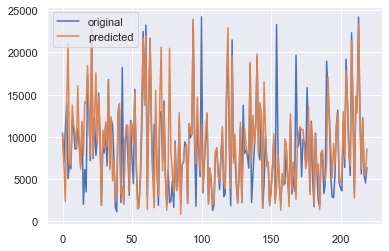

In [132]:
plt.plot(y5_test, label='original')
plt.plot(y5_pred, label = 'predicted')
plt.legend()
plt.show()

In [133]:
metrics.r2_score(y5_test,y5_pred)

0.4916405316992982

# Deploying the model

Fitting the model.

In [135]:
input_data = (30,0,32.4,1,0,3)

#changing input data to a numpy array

input_data_as_npa = np.asarray(input_data)

#reshape the array 
input_data_reshaped = input_data_as_npa.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

print(prediction)

# y_test value = 4149.736

[5309.67961416]
